<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/beginner/workshop5/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
columns = iris.feature_names
y = iris.target

In [ ]:
X = pd.DataFrame(iris.data)
X.columns = columns
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, prediction)
  scores_list.append(metrics.accuracy_score(y_test, prediction))

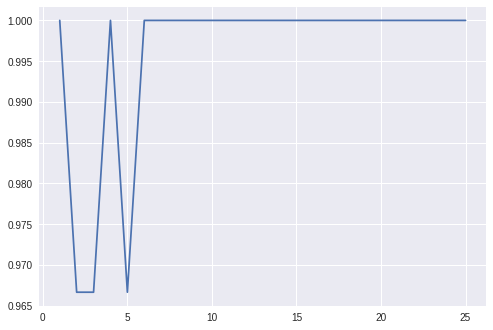

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
flowers = {0:'setosa', 1:'versicolor', 3:'virginica'}
x_input = [[3, 4, 5, 2], [5, 4, 2, 2]]
input_predict = knn.predict(x_input)
print(flowers[input_predict[0]])
print(flowers[input_predict[1]])

versicolor
setosa


#Confusion Matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

#AUC-ROC Curve

In [ ]:
#import necessary libraries, sklearn will do the job for us
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#create arbitrary data using the sklearn make_classification method
X,y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

#split into train_test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=27)


In [ ]:
#train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#logistic regression
model_1 = LogisticRegression()

#KNeighbor
model_2 = KNeighborsClassifier(n_neighbors=4)

#fit the model
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

#predict probabilities
pred_prob_1 = model_1.predict_proba(X_test)
pred_prob_2 = model_2.predict_proba(X_test)

In [ ]:
#sklearn has a powerful method, the build-in function roc_curve()
#which computes the ROC dor our classifier pretty fast
#it will returns the FPR, TPR, and threshold values
from sklearn.metrics import roc_curve

#roc curve for models
fpr_1, tpr_1, thresh_1=roc_curve(y_test, pred_prob_1[:,1], pos_label=1)
fpr_2, tpr_2, thresh_2=roc_curve(y_test, pred_prob_2[:,1], pos_label=1)

#roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thresh = roc_curve(y_test, random_probs, pos_label=1)


In [ ]:
# AUC score by roc_auc_scores() method
from sklearn.metrics import roc_auc_score

#auc scores
auc_score_1 = roc_auc_score(y_test, pred_prob_1[:,1])
auc_score_2 = roc_auc_score(y_test, pred_prob_2[:,1])

print(auc_score_1, auc_score_2)

0.9758522727272727 0.9121854707792207


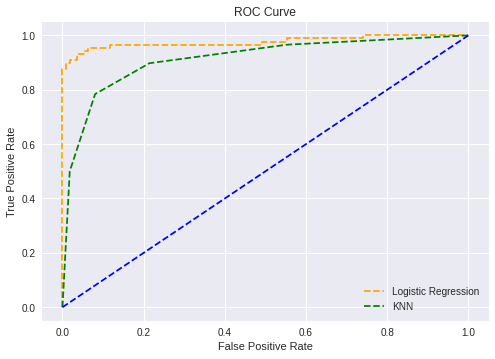

In [ ]:
#visualize the ROC curve with MatPlotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#Seaborn splits parameters into two independent groups

#plot roc curves
plt.plot(fpr_1, tpr_1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(fpr_2, tpr_2, linestyle='--', color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') #plot the fpr, ptr values
plt.title('ROC Curve') #title
plt.xlabel('False Positive Rate') #x-label
plt.ylabel('True Positive Rate') #y-label
plt.legend(loc='best')
plt.show();
#from the plot, AUC for the Logistic Regression is higher than that for the KNN
#logistic regression did a better job for classifying the positive class in the dataset